<a href="https://colab.research.google.com/github/ankit-verma2000/Portfolio-Repo/blob/main/Rainfall_trend.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Rainfall** plays a critical role in India’s economy by influencing agriculture, water resource management, and disaster preparedness. The given dataset spans from 1901 to 2015, which offers a comprehensive view of rainfall patterns across the country.

- It provides detailed monthly rainfall data, seasonal aggregations, and annual totals. The dataset is structured to include columns for each month (e.g., January to December), seasonal rainfall (e.g., Monsoon from June to September), and yearly aggregated rainfall figures.

## Rainfall Trends in India Analysis: Overview and Dataset
In this analysis, we aim to uncover long-term trends, seasonal patterns, and anomalies in India’s rainfall data. We will examine historical rainfall trends, detect years with extreme or deficient rainfall, explore relationships between seasonal and annual rainfall, and forecast future rainfall using time series models.

For this analysis, we rely on a dataset containing monthly, seasonal, and annual rainfall measurements spanning over a century. I found an ideal dataset for this task, which includes monthly rainfall values, seasonal aggregations (e.g., monsoon rainfall), and annual totals, all of which are essential for understanding variability, detecting anomalies, and predicting future trends.

## Rainfall Trends in India Analysis with Python
**Now, we will begin by loading and exploring the dataset, which contains rainfall data for India from 1901 to 2015. Each record provides monthly, seasonal, and annual rainfall measurements. This data is critical for understanding long-term trends, seasonal variations, and extreme weather events:**

In [92]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

rainfall_data = pd.read_csv("/content/rainfall_area-wt_India_1901-2015.csv")
rainfall_data.head()

,REGION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,INDIA,1901,34.7,37.7,18.0,39.3,50.8,113.4,242.2,272.9,124.4,52.7,38.0,8.3,1032.3,72.4,108.1,752.8,99.0
1,INDIA,1902,7.4,4.3,19.0,43.5,48.3,108.8,284.0,199.7,201.5,61.5,27.9,24.4,1030.2,11.7,110.8,794.0,113.8
2,INDIA,1903,17.0,8.3,31.3,17.1,59.5,118.3,297.0,270.4,199.1,117.9,36.9,17.7,1190.5,25.3,107.9,884.8,172.5
3,INDIA,1904,14.4,9.6,31.8,33.1,72.4,164.8,261.0,206.4,129.6,69.0,11.2,16.3,1019.8,24.0,137.4,761.8,96.6
4,INDIA,1905,25.3,20.9,42.7,33.7,55.7,93.3,252.8,200.8,178.4,51.4,9.7,10.5,975.3,46.2,132.2,725.4,71.6


In [93]:
# analyze trends in annual rainfall over time
annual_rainfall = rainfall_data[['YEAR', 'ANNUAL']]

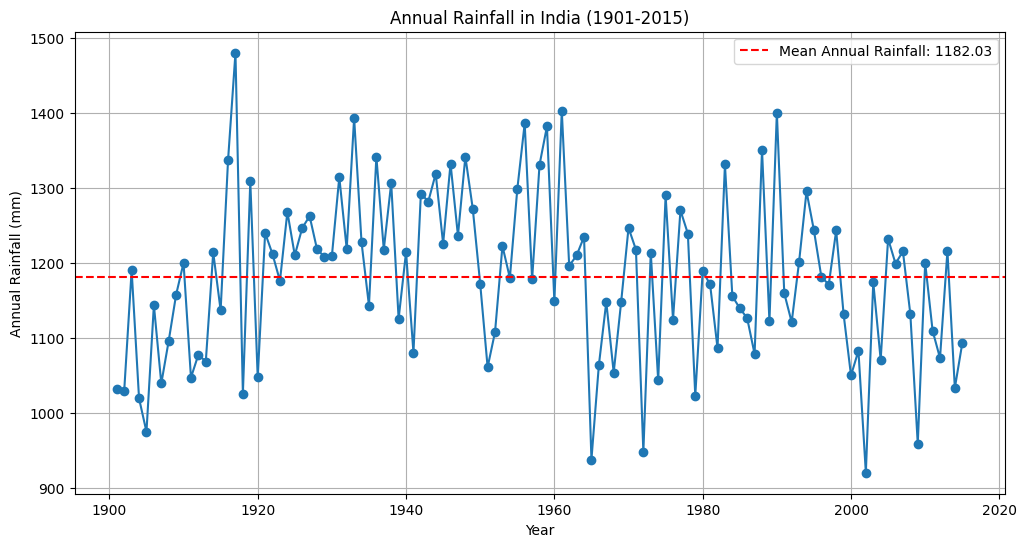

In [94]:
# Calculated the mean annual rainfall
mean_annual_rainfall = annual_rainfall['ANNUAL'].mean()

# Create the line chart
plt.figure(figsize=(12, 6))
plt.plot(annual_rainfall['YEAR'], annual_rainfall['ANNUAL'], marker='o', linestyle='-')
# for mean of annual rainfall.
plt.axhline(y=mean_annual_rainfall, color='r', linestyle='--', label=f'Mean Annual Rainfall: {mean_annual_rainfall:.2f}')

# Customize the chart
plt.title('Annual Rainfall in India (1901-2015)')
plt.xlabel('Year')
plt.ylabel('Annual Rainfall (mm)')
plt.legend()
plt.grid(True)
plt.show()


**The above graph shows significant year-to-year variability in India’s annual rainfall, with no apparent long-term upward or downward trend over the century. The red dashed line indicates the mean rainfall, around which the annual rainfall oscillates. Notable peaks and troughs highlight extreme rainfall events and dry years.**

In [95]:
# seasonal rainfall distribution
seasonal_columns = ['Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec']
seasonal_avg = rainfall_data[seasonal_columns].mean()
seasonal_avg

,0
Jan-Feb,43.189565
Mar-May,128.694783
Jun-Sep,890.260870
Oct-Dec,119.882609


<ipython-input-96-48cfb81d747a>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




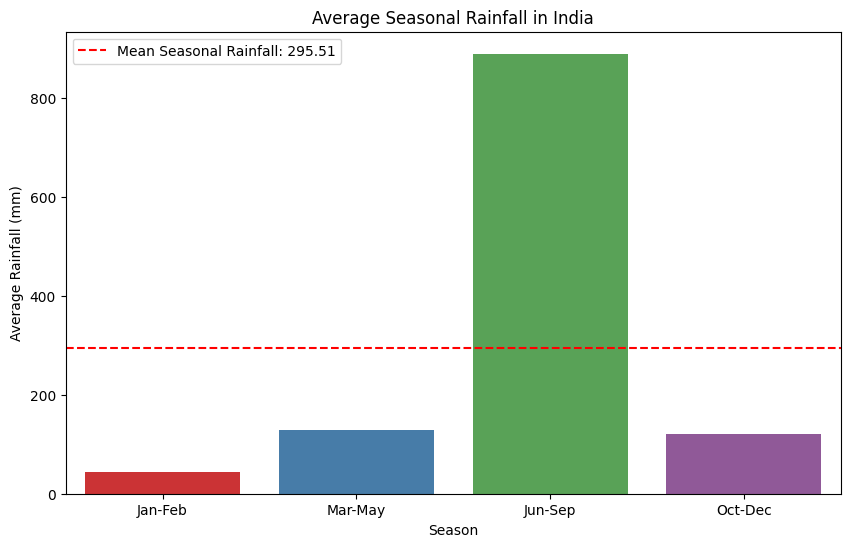

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=seasonal_avg.index, y=seasonal_avg.values, palette= 'Set1')
plt.axhline(y=seasonal_avg.mean(), color='r', linestyle='--', label=f'Mean Seasonal Rainfall: {seasonal_avg.mean():.2f}')
plt.title('Average Seasonal Rainfall in India')
plt.xlabel('Season')
plt.ylabel('Average Rainfall (mm)')
plt.legend()
plt.show()


**The seasonal distribution highlights the dominance of the monsoon season (June to September), which contributes the bulk of annual rainfall (around 890 mm). In contrast, the other seasons (January-February, March-May, and October-December) contribute significantly less to the annual total, which emphasizes the critical role of the monsoon.**

In [97]:
# identify months with the highest and lowest rainfall on average
monthly_columns = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
monthly_avg = rainfall_data[monthly_columns].mean()
monthly_avg

,0
JAN,19.759130
FEB,23.434783
MAR,28.254783
APR,38.241739
MAY,62.193913
JUN,168.360000
JUL,291.022609
AUG,258.400870
SEP,172.473043
OCT,75.701739


<ipython-input-98-8277872c82e3>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




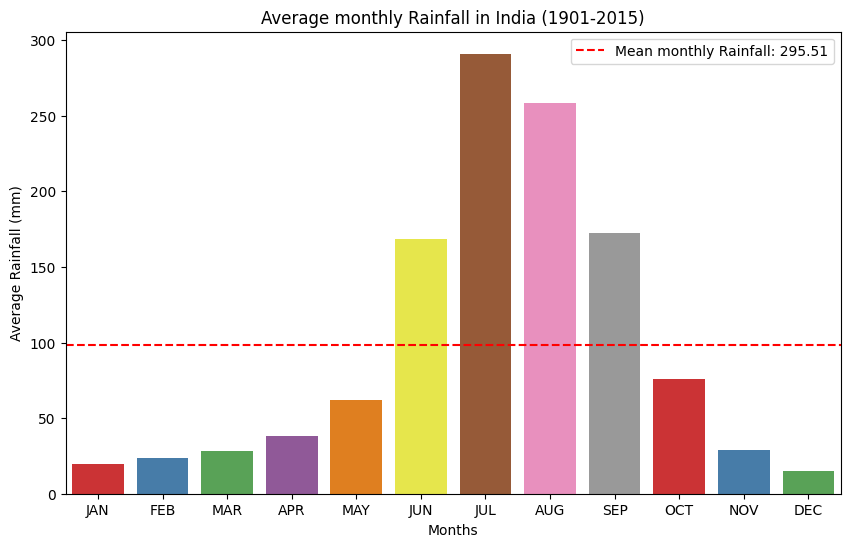

In [98]:
plt.figure(figsize=(10, 6))
sns.barplot(x =monthly_avg.index, y=monthly_avg.values, palette= 'Set1')
plt.axhline(y=monthly_avg.mean(), color='r', linestyle='--', label=f'Mean monthly Rainfall: {seasonal_avg.mean():.2f}')
plt.title('Average monthly Rainfall in India (1901-2015)')
plt.xlabel('Months')
plt.ylabel('Average Rainfall (mm)')
plt.legend()
plt.show()

**This bar chart illustrates a highly uneven distribution of rainfall across months, with July and August receiving the highest average rainfall. The red dashed line represents the mean monthly rainfall, showing that most months receive rainfall below the average, except during the monsoon months (June to September).**

## Assessing the Impact of Climate Change in the Rainfall Trends in India
- we will calculate a 10-year rolling average of annual rainfall to identify long-term trends and smooth out short-term variations. This will help assess the potential impact of climate change on rainfall patterns:

In [99]:
# calculating rolling averages to assess climate change impact
rainfall_data['10-Year Rolling Avg'] = rainfall_data['ANNUAL'].rolling(window=10).mean()
rainfall_data['10-Year Rolling Avg']

,10-Year Rolling Avg
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
110,1121.61
111,1136.88
112,1141.05
113,1137.29


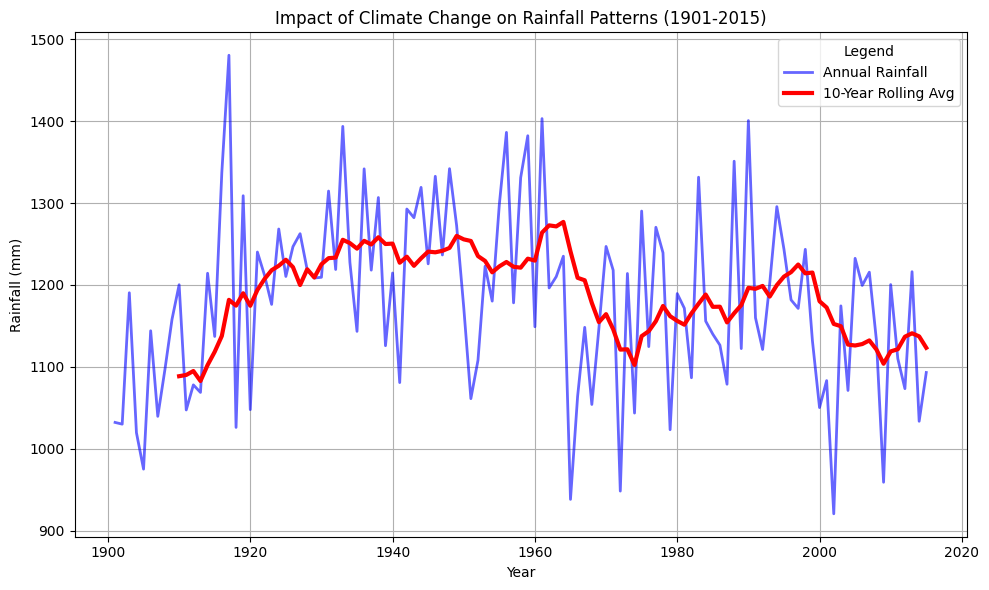

In [100]:
plt.figure(figsize=(10, 6))
# Plot the Annual Rainfall
sns.lineplot(data=rainfall_data, x='YEAR', y='ANNUAL', label='Annual Rainfall', color='blue', linewidth=2, alpha=0.6)
# Plot the 10-Year Rolling Average
sns.lineplot(data=rainfall_data, x='YEAR', y='10-Year Rolling Avg', label='10-Year Rolling Avg', color='red', linewidth=3)

plt.title('Impact of Climate Change on Rainfall Patterns (1901-2015)')
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')
plt.legend(title='Legend')
plt.grid(True)

plt.tight_layout()
plt.show()

**From the graph we observe the annual rainfall trends in India (blue line) and a 10-year rolling average (red line) to identify long-term patterns. While annual rainfall exhibits significant variability, the 10-year rolling average indicates a slight downward trend post-1960, which suggests a possible impact of climate change on rainfall distribution. Periods of higher averages in the early 20th-century contrast with more consistent but lower averages in recent decades.**

## Using statistical thresholds (1.5 standard deviations below or above the mean), let’s identify years with extreme or deficient rainfall. This will help detect drought years and periods of excessive rainfall:

In [101]:
from scipy.stats import pearsonr

# identifying drought and extreme rainfall years
mean_rainfall = rainfall_data['ANNUAL'].mean()
std_dev_rainfall = rainfall_data['ANNUAL'].std()

drought_years = rainfall_data[rainfall_data['ANNUAL'] < (mean_rainfall - 1.5 * std_dev_rainfall)]
extreme_rainfall_years = rainfall_data[rainfall_data['ANNUAL'] > (mean_rainfall + 1.5 * std_dev_rainfall)]

In [102]:
# correlating seasonal rainfall with annual rainfall totals
seasonal_columns = ['Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec']
seasonal_correlations = {
    season: pearsonr(rainfall_data[season], rainfall_data['ANNUAL'])[0] for season in seasonal_columns
}

# displaying results for drought/extreme years and correlations
drought_years_summary = drought_years[['YEAR', 'ANNUAL']].reset_index(drop=True)
extreme_rainfall_years_summary = extreme_rainfall_years[['YEAR', 'ANNUAL']].reset_index(drop=True)
seasonal_correlations_summary = pd.DataFrame.from_dict(seasonal_correlations, orient='index', columns=['Correlation'])

drought_years_summary, extreme_rainfall_years_summary, seasonal_correlations_summary

(   YEAR  ANNUAL
 0  1905   975.3
 1  1965   938.4
 2  1972   948.5
 3  2002   920.8
 4  2009   959.3,
    YEAR  ANNUAL
 0  1917  1480.3
 1  1933  1393.5
 2  1956  1386.2
 3  1959  1382.1
 4  1961  1403.0
 5  1988  1351.0
 6  1990  1400.6,
          Correlation
 Jan-Feb     0.228913
 Mar-May     0.313057
 Jun-Sep     0.930027
 Oct-Dec     0.531648)

**The analysis identifies five significant drought years (e.g., 2002 and 2009) and seven extreme rainfall years (e.g., 1917 and 1990) based on deviations from the mean annual rainfall. Seasonal rainfall correlations with annual totals reveal that the monsoon season (June-September) has the strongest correlation (0.93), which indicates it predominantly drives annual rainfall patterns. In contrast, other seasons like January-February (0.23) and March-May (0.31) have weaker correlations, which emphasizes the critical role of the monsoon in India’s overall rainfall dynamics.**

## Detecting Anomalies in the Rainfall Trends in India

Now, using an Isolation Forest algorithm, we will identify anomalies in both annual and monthly rainfall. This will highlight specific years or months with unusual rainfall patterns. Let’s start with identifying anomalies in annual rainfall:

In [103]:
from sklearn.ensemble import IsolationForest

# Detect anomalous rainfall years based on annual data
isolation_forest = IsolationForest(contamination=0.05, random_state=42)
rainfall_data['Annual_Anomaly'] = isolation_forest.fit_predict(rainfall_data[['ANNUAL']])

# Identify anomalies in annual rainfall
annual_anomalies = rainfall_data[rainfall_data['Annual_Anomaly'] == -1]


In [104]:
rainfall_data.head()

,REGION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,...,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec,10-Year Rolling Avg,Annual_Anomaly
0,INDIA,1901,34.7,37.7,18.0,39.3,50.8,113.4,242.2,272.9,...,52.7,38.0,8.3,1032.3,72.4,108.1,752.8,99.0,NaN,1
1,INDIA,1902,7.4,4.3,19.0,43.5,48.3,108.8,284.0,199.7,...,61.5,27.9,24.4,1030.2,11.7,110.8,794.0,113.8,NaN,1
2,INDIA,1903,17.0,8.3,31.3,17.1,59.5,118.3,297.0,270.4,...,117.9,36.9,17.7,1190.5,25.3,107.9,884.8,172.5,NaN,1
3,INDIA,1904,14.4,9.6,31.8,33.1,72.4,164.8,261.0,206.4,...,69.0,11.2,16.3,1019.8,24.0,137.4,761.8,96.6,NaN,1
4,INDIA,1905,25.3,20.9,42.7,33.7,55.7,93.3,252.8,200.8,...,51.4,9.7,10.5,975.3,46.2,132.2,725.4,71.6,NaN,-1


In [105]:
# Detect anomalous months based on monthly data
monthly_data = rainfall_data[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']]
monthly_anomalies = isolation_forest.fit_predict(monthly_data)

# Add anomaly detection results for months
rainfall_data['Monthly_Anomaly'] = monthly_anomalies
monthly_anomalies_df = rainfall_data[rainfall_data['Monthly_Anomaly'] == -1][['YEAR'] + monthly_data.columns.tolist()]

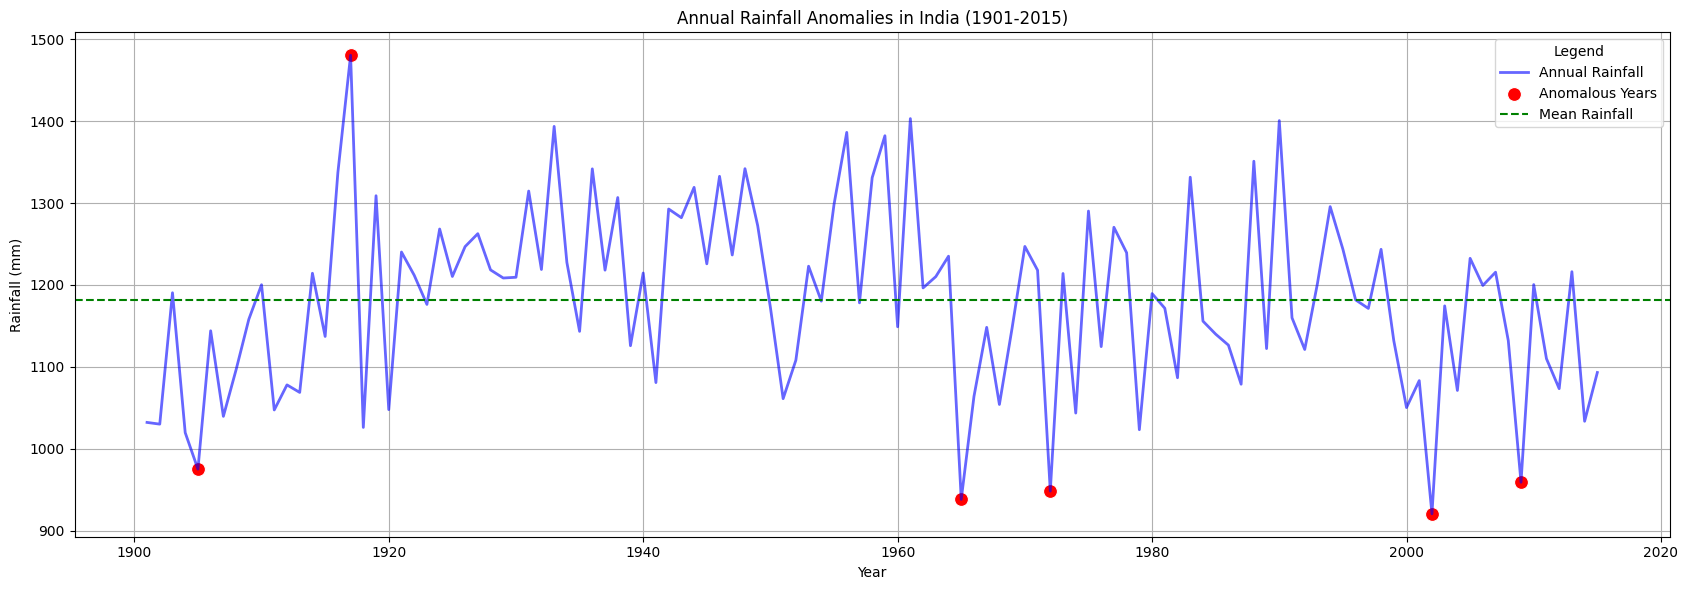

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
6,1907,16.2,46.0,37.8,62.8,32.6,154.4,225.4,310.4,96.9,22.7,22.5,12.1
10,1911,45.7,5.6,49.9,22.8,47.6,191.9,162.7,213.5,182.3,70.6,42.8,12.0
16,1917,8.7,38.7,22.8,43.2,75.0,231.8,285.2,296.5,281.0,158.8,28.2,10.3
17,1918,12.2,4.4,41.6,38.8,102.8,212.6,183.8,242.7,109.7,20.0,41.1,16.4
66,1967,11.2,13.4,63.3,29.1,42.4,144.9,304.6,262.9,170.4,40.3,11.4,54.4
89,1990,14.9,44.3,53.3,42.0,114.5,194.0,286.7,293.2,196.6,103.2,29.5,28.4


In [106]:
plt.figure(figsize=(17, 6))

# Plot the Annual Rainfall
sns.lineplot(data=rainfall_data, x='YEAR', y='ANNUAL', label='Annual Rainfall', color='blue', linewidth=2, alpha=0.6)

# Plot the Anomalous Years as red markers
sns.scatterplot(data=annual_anomalies, x='YEAR', y='ANNUAL', label='Anomalous Years', color='red', s=100, marker='o')

# Add mean line for Annual Rainfall
plt.axhline(y=rainfall_data['ANNUAL'].mean(), color='green', linestyle='--', label='Mean Rainfall')

# Customize the plot
plt.title('Annual Rainfall Anomalies in India (1901-2015)')
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')
plt.legend(title="Legend")
plt.grid(True)
plt.tight_layout()
plt.show()
monthly_anomalies_df

**Above graph highlights the years with significant rainfall anomalies, where annual rainfall deviated substantially from the mean. Drought years (e.g., 1905, 1965, 2002) and extreme rainfall years (e.g., 1917, 1961) are marked as red points, which showcase outliers in rainfall patterns. While most years cluster around the mean (green dashed line), the anomalies emphasize the variability in India’s rainfall, driven by factors like monsoonal fluctuations and climate events. This underscores the need for monitoring and preparedness for extreme weather events.**

## Correlating Seasonal Rainfall with Annual Totals

In [107]:
# Columns to compare
seasonal_columns = ['Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec']
monsoon_column = 'Jun-Sep'
relationships = {}

# Calculate correlation between Monsoon and other seasons
for season in seasonal_columns:
    if season != monsoon_column:
        corr, _ = pearsonr(rainfall_data[monsoon_column], rainfall_data[season])
        relationships[season] = corr

In [108]:
relationships

{'Jan-Feb': np.float64(0.14273134438067206),
 'Mar-May': np.float64(0.10433984966925225),
 'Oct-Dec': np.float64(0.28651956453523547)}

In [109]:
# Convert to DataFrame
correlation_data = pd.DataFrame({
    'Season': list(relationships.keys()),
    'Correlation Coefficient': list(relationships.values())})
correlation_data

,Season,Correlation Coefficient
0,Jan-Feb,0.142731
1,Mar-May,0.104340
2,Oct-Dec,0.286520


<ipython-input-110-44955557614e>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




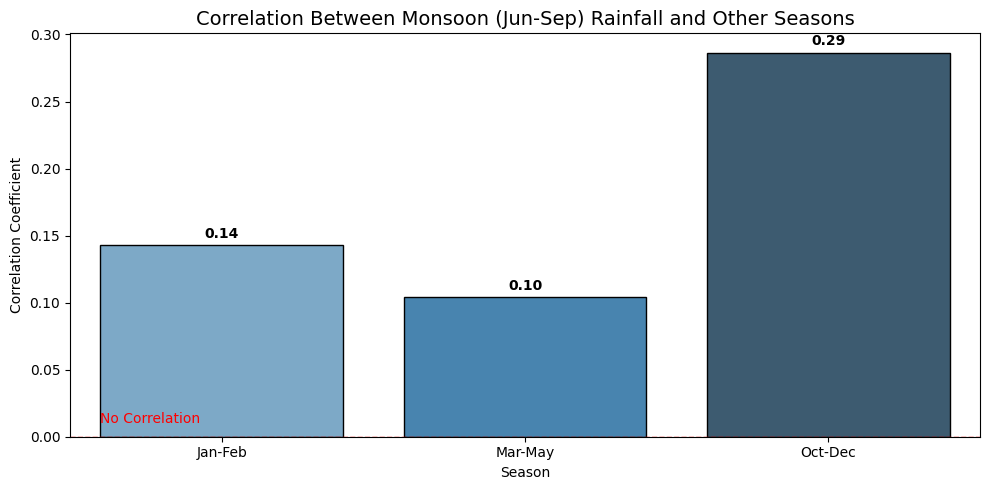

In [110]:
plt.figure(figsize=(10, 5))
barplot = sns.barplot(
    data=correlation_data,
    x='Season',
    y='Correlation Coefficient',
    palette='Blues_d',
    edgecolor='black'
)

# Add horizontal line at y=0
plt.axhline(0, linestyle='--', color='red', linewidth=1)
plt.text(-0.4, 0.01, 'No Correlation', color='red')

 #Add bar labels using plt.bar_label()
for container in barplot.containers:
    plt.bar_label(container, fmt='%.2f', label_type='edge', padding=3, fontsize=10, fontweight='bold')

# Title and labels
plt.title('Correlation Between Monsoon (Jun-Sep) Rainfall and Other Seasons', fontsize=14)
plt.xlabel('Season')
plt.ylabel('Correlation Coefficient')
plt.tight_layout()
plt.show()

**This graph shows the correlation between monsoon rainfall and rainfall during other seasons. The October-December season has the highest correlation (0.29), which suggests a moderate relationship, possibly due to the post-monsoon retreat rains. The January-February (0.14) and March-May (0.10) seasons exhibit weaker correlations, which indicate minimal dependence on monsoon rainfall. This highlights the dominance of monsoonal patterns as an independent driver of India’s annual rainfall, with limited spillover effects on other seasons.**

## Grouping Years Based on Rainfall Patterns
Now, by applying k-means clustering, we will group years into three categories: Dry, Normal, and Wet, based on rainfall patterns:

In [111]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Step 1: Feature selection and scaling
rainfall_features = rainfall_data[['Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec', 'ANNUAL']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(rainfall_features)

In [112]:
scaled_features

array([[ 2.02663664e+00, -9.03463299e-01, -1.54814886e+00,
        -6.46007264e-01, -1.35870651e+00],
       [-2.18476401e+00, -7.85018207e-01, -1.08413511e+00,
        -1.88166596e-01, -1.37776209e+00],
       [-1.24118825e+00, -9.12237009e-01, -6.15028772e-02,
         1.62772848e+00,  7.68141228e-02],
       [-1.33138299e+00,  3.81885285e-01, -1.44678663e+00,
        -7.20251697e-01, -1.47213260e+00],
       [ 2.08865684e-01,  1.53768813e-01, -1.85674052e+00,
        -1.49363120e+00, -1.87592949e+00],
       [ 1.99888441e+00, -1.93876113e+00,  6.80155226e-02,
        -8.84208152e-01, -3.44223534e-01],
       [ 1.31201676e+00,  1.93250510e-01, -1.16184615e+00,
        -1.93600428e+00, -1.29155826e+00],
       [-2.49046084e-01, -1.81154233e+00,  3.00022395e-01,
        -2.07830611e+00, -7.75242688e-01],
       [-1.31099113e-01, -2.80529856e-01,  2.92138667e-01,
        -1.28636550e+00, -2.17186310e-01],
       [-1.14405545e+00, -1.93876113e+00,  5.63564183e-01,
         8.94564713e-01

In [113]:
# Step 2: KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
rainfall_data['Rainfall_Cluster'] = kmeans.fit_predict(scaled_features)


In [114]:
rainfall_data.head()

,REGION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,...,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec,10-Year Rolling Avg,Annual_Anomaly,Monthly_Anomaly,Rainfall_Cluster
0,INDIA,1901,34.7,37.7,18.0,39.3,50.8,113.4,242.2,272.9,...,8.3,1032.3,72.4,108.1,752.8,99.0,NaN,1,1,1
1,INDIA,1902,7.4,4.3,19.0,43.5,48.3,108.8,284.0,199.7,...,24.4,1030.2,11.7,110.8,794.0,113.8,NaN,1,1,1
2,INDIA,1903,17.0,8.3,31.3,17.1,59.5,118.3,297.0,270.4,...,17.7,1190.5,25.3,107.9,884.8,172.5,NaN,1,1,2
3,INDIA,1904,14.4,9.6,31.8,33.1,72.4,164.8,261.0,206.4,...,16.3,1019.8,24.0,137.4,761.8,96.6,NaN,1,1,1
4,INDIA,1905,25.3,20.9,42.7,33.7,55.7,93.3,252.8,200.8,...,10.5,975.3,46.2,132.2,725.4,71.6,NaN,-1,1,1


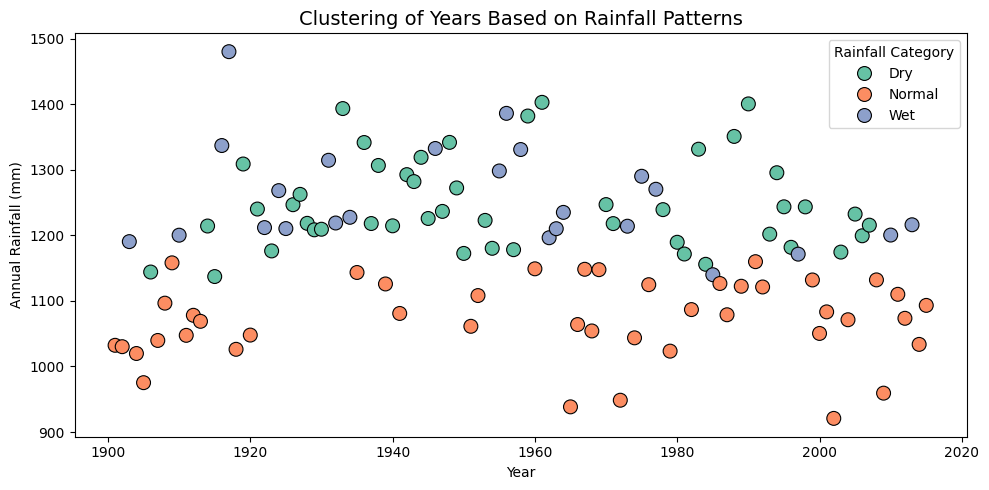

In [115]:
# Step 3: Mapping cluster labels to meaningful categories
# (you might need to adjust this based on cluster center inspection)
cluster_labels = {0: 'Dry', 1: 'Normal', 2: 'Wet'}
rainfall_data['Rainfall_Category'] = rainfall_data['Rainfall_Cluster'].map(cluster_labels)

# Optional: Ensure categories are in a desired order
category_order = ['Dry', 'Normal', 'Wet']

# Step 4: Seaborn scatterplot
plt.figure(figsize=(10, 5))

scatter = sns.scatterplot(
    data=rainfall_data,
    x='YEAR',
    y='ANNUAL',
    hue='Rainfall_Category',
    palette='Set2',
    hue_order=category_order,
    s=100,
    edgecolor='black'
)

# Title and labels
plt.title('Clustering of Years Based on Rainfall Patterns', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Annual Rainfall (mm)')
plt.legend(title='Rainfall Category')
plt.tight_layout()
plt.show()


**The clusters reveal that most years fall into the Normal category, while Wet years (above-normal rainfall) are distributed at irregular throughout the timeline, with a concentration in the early and mid-20th century. Dry years (below-normal rainfall) are more frequent in the latter half of the timeline, which indicates a potential shift in rainfall patterns over time. This clustering emphasizes the variability and potential long-term changes in India’s rainfall dynamics.**

## Forecasting Future Rainfall:(using facebook profet)
Finally, we will use the Prophet library to forecast annual rainfall for the next 20 years:

In [116]:
rainfall_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   REGION               115 non-null    object 
 1   YEAR                 115 non-null    int64  
 2   JAN                  115 non-null    float64
 3   FEB                  115 non-null    float64
 4   MAR                  115 non-null    float64
 5   APR                  115 non-null    float64
 6   MAY                  115 non-null    float64
 7   JUN                  115 non-null    float64
 8   JUL                  115 non-null    float64
 9   AUG                  115 non-null    float64
 10  SEP                  115 non-null    float64
 11  OCT                  115 non-null    float64
 12  NOV                  115 non-null    float64
 13  DEC                  115 non-null    float64
 14  ANNUAL               115 non-null    float64
 15  Jan-Feb              115 non-null    flo

In [117]:
# rainfall_data['DATE'] = pd.to_datetime(rainfall_data['YEAR'], format='%Y')
# # time series -data:
# annual_rainfall_ts = rainfall_data.set_index('DATE')['ANNUAL']

In [118]:
# annual_rainfall_ts

In [119]:
import pandas as pd
from prophet import Prophet
from prophet.plot import plot_plotly
import plotly.io as pio

# 🔧 Fix for Google Colab
pio.renderers.default = 'colab'

# Prepare your data
rainfall_data['DATE'] = pd.to_datetime(rainfall_data['YEAR'], format='%Y')
prophet_df = rainfall_data[['DATE', 'ANNUAL']].rename(columns={'DATE': 'ds', 'ANNUAL': 'y'})

# Build and train the model
model = Prophet(yearly_seasonality=True)
model.fit(prophet_df)

# Forecast for next 20 years
future = model.make_future_dataframe(periods=20, freq='YE')  # Use 'YE' instead of deprecated 'Y'
forecast = model.predict(future)

# Plot forecast
fig = plot_plotly(model, forecast)
fig.update_layout(
    title='Annual Rainfall Forecast Using Prophet',
    xaxis_title='Year',
    yaxis_title='Rainfall (mm)',
    template='plotly_white',
    height=500
)
fig.show()



INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxjsxxhgo/etsm87cu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxjsxxhgo/klz16i9t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53267', 'data', 'file=/tmp/tmpxjsxxhgo/etsm87cu.json', 'init=/tmp/tmpxjsxxhgo/klz16i9t.json', 'output', 'file=/tmp/tmpxjsxxhgo/prophet_modelb2hlcbn2/prophet_model-20250408153750.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:37:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:37:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [121]:
from prophet.plot import plot_components_plotly
plot_components_plotly(model, forecast).show()


/usr/local/lib/python3.11/dist-packages/plotly/io/_json.py:560: UserWarning:

Discarding nonzero nanoseconds in conversion.



**The blue line represents the model’s forecast trend, while the shaded area indicates the confidence interval. The trend reveals a slight decline in annual rainfall over time, with notable year-to-year variability (black dots representing actual data points). The model captures the variability well but highlights that future rainfall may continue to slightly decrease, which emphasizes the need for adaptive strategies to manage potential water resource challenges.**

# **Conclusion**

- The analysis of India’s rainfall trends and patterns from 1901 to 2015 reveals significant variability in annual and seasonal rainfall, with the monsoon season (June-September) being the dominant contributor.
- Anomalous years of extreme drought and wetness highlight the unpredictability of rainfall, while clustering shows a shift towards more dry years in recent decades.
- Correlations indicate the limited dependency of non-monsoon seasons on monsoon rainfall.
- A time-series forecast using Prophet suggests a slight declining trend in annual rainfall, which emphasises the need for long-term water resource planning and adaptation to changing climate patterns.